In [36]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# import meals data
meals = pd.read_csv("backend/data/meal_history.csv")
meals.head()

,Date,TypeOfMeal,DishName,Calories,Protein,Fruits,Vegetables,Grains,Dairy,Link
0,6/24/25,Breakfast,Milk,149,0.0,0.0,0.00,0.0,1.0,NaN
1,6/24/25,Breakfast,Sweet potato hash with egg,300,2.5,0.0,1.00,0.0,0.0,https://www.myplate.gov/recipes/sweet-potato-h...
2,6/24/25,Lunch,chicken fried rice,440,1.5,0.0,0.25,2.0,0.0,https://www.myplate.gov/recipes/fried-rice
3,6/24/25,Dinner,Fish tacos,320,2.0,0.0,0.75,2.0,0.0,https://www.myplate.gov/recipes/simple-fish-tacos
4,6/24/25,Snack,Very berry smoothie,250,0.0,2.5,0.00,0.0,1.0,https://www.myplate.gov/recipes/very-berry-smo...


<Axes: xlabel='Date', ylabel='Calories'>

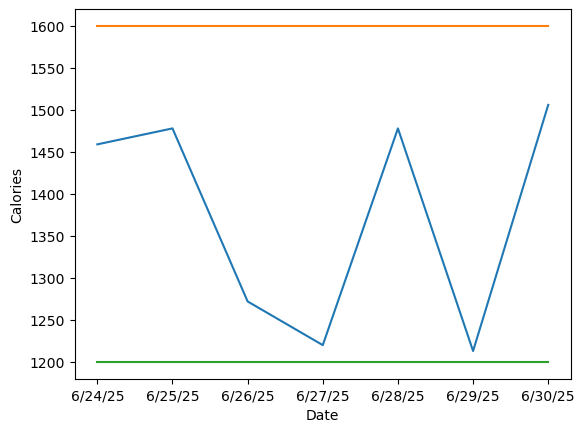

In [38]:
#line graph of total calories by day. 
group_by_date = meals.groupby("Date")[["Calories", "Protein", "Grains", "Vegetables", "Dairy"]].sum()

group_by_date["Max Calories"] = 1600
group_by_date["Min Calories"] = 1200

sns.lineplot(data=group_by_date,x="Date", y="Calories",)
sns.lineplot(data=group_by_date,x="Date", y="Max Calories")
sns.lineplot(data=group_by_date,x="Date", y="Min Calories")



Text(0.5, 1.0, 'Food Groups Breakdown for 6/27/25')

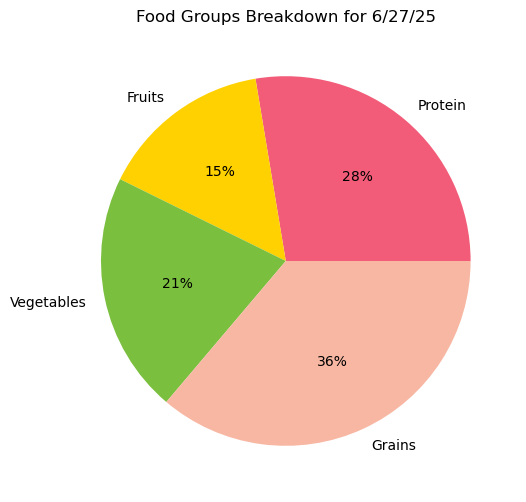

In [39]:
#group by date, display protein, fruits, vegetables, grain, dairy
food_groups = group_by_date[["Protein", "Grains", "Vegetables", "Dairy"]]

#filter out a date
meal_df = meals[(meals['Date'] == '6/27/25')]
group_totals = meal_df[['Protein', 'Fruits', 'Vegetables', 'Grains']].sum()
group_totals = group_totals[group_totals > 0]
colors = {
    "Fruits": "#FFD100",
    "Vegetables": "#7BBF3F",
    "Protein": "#F25C78",
    "Grains": "#F7B7A3",
    "Dairy": "#C9E3DC"
}
color_list = [colors[label] for label in group_totals.index]

plt.figure(figsize=(6,6))
plt.pie(
    group_totals,
    labels=group_totals.index,
    autopct='%1.0f%%',
    colors=color_list
)
plt.title("Food Groups Breakdown for 6/27/25")

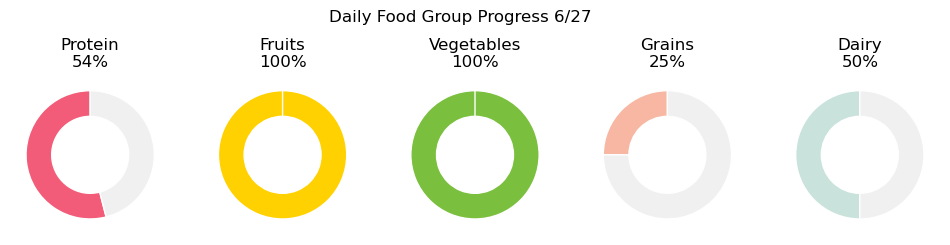

In [40]:

meal_df = meals[(meals['Date'] == '6/29/25')]
group_totals = meal_df[['Protein', 'Fruits', 'Vegetables', 'Grains', 'Dairy']].sum()

goal_min = {
    "Protein": 3,
    "Fruits": 1,
    "Vegetables": 1.5,
    "Grains": 4,
    "Dairy": 2.5
}

labels = list(group_totals.keys())
percentages = [min(group_totals[k] / goal_min[k], 1.0) for k in labels] 

colors = {
    "Fruits": "#FFD100",
    "Vegetables": "#7BBF3F",
    "Protein": "#F25C78",
    "Grains": "#F7B7A3",
    "Dairy": "#C9E3DC"
}

fig, axs = plt.subplots(1, len(labels), figsize=(12, 3))

for i, label in enumerate(labels):
    filled = percentages[i]
    remaining = 1 - filled

    axs[i].pie(
        [filled, remaining],
        radius=1,
        startangle=90,
        colors=[colors[label], "#f0f0f0"],
        wedgeprops={"width": 0.4, "edgecolor": "white"}
    )
    axs[i].set(aspect="equal")
    axs[i].set_title(f"{label.capitalize()}\n{filled*100:.0f}%")

plt.suptitle("Daily Food Group Progress 6/27")

plt.show()
